<a href="https://colab.research.google.com/github/Pradeep8896/World-cup-2019-Analysis/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [2]:
#df1=pd.read_csv('/content/drive/MyDrive/Data_for_pract/Car Dekho/CAR DETAILS FROM CAR DEKHO.csv')
df2=pd.read_csv('/content/drive/MyDrive/Data_for_pract/Car Dekho/Car details v3.csv')
#df3=pd.read_csv('/content/drive/MyDrive/Data_for_pract/Car Dekho/car data.csv')

In [3]:
df2.shape

(8128, 13)

In [4]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Continue with df2

In [5]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
df2.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
df2['name'].nunique()

2058

In [8]:
df2['car_name']=df2['name'].apply(lambda x:x.split()[0:2])

In [9]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,"[Maruti, Swift]"
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,"[Skoda, Rapid]"
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,"[Honda, City]"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,"[Hyundai, i20]"
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,"[Maruti, Swift]"


In [10]:
df2['car_name']=df2['car_name'].apply(lambda x:' '.join(x))

In [11]:
df3=df2.drop(['name'],axis=1)

In [12]:
df3.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti Swift
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda Rapid
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift


In [13]:
df3['current_year']=2022

In [14]:
df3['used_year']=df3['current_year']-df3['year']

In [15]:
df4=df3.drop(['year','current_year'],axis=1)

In [16]:
df4.shape

(8128, 13)

In [17]:
df5=df4.dropna()

In [18]:
df5.shape

(7906, 13)

In [19]:
df5.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,used_year
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti Swift,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda Rapid,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift,15


In [22]:
df5['mileage']=df5['mileage'].apply(lambda x:x.split()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df5.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,used_year
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti Swift,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda Rapid,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift,15


In [24]:
df5['engine_cc']=df5['engine'].apply(lambda x:x.split()[0])
df5['max_power_bhp']=df5['max_power'].apply(lambda x:x.split()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df5.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,used_year,engine_cc,max_power_bhp
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti Swift,8,1248,74
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda Rapid,8,1498,103.52
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City,16,1497,78
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20,12,1396,90
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift,15,1298,88.2


In [26]:
df6=df5.drop(['max_power','engine'],axis=1)

In [27]:
df6.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,torque,seats,car_name,used_year,engine_cc,max_power_bhp
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,190Nm@ 2000rpm,5.0,Maruti Swift,8,1248,74
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,250Nm@ 1500-2500rpm,5.0,Skoda Rapid,8,1498,103.52
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City,16,1497,78
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20,12,1396,90
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift,15,1298,88.2


In [31]:
df6['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rpm', '

In [62]:
def torque_nm(text):
  temp_tor_li=text.split()
  temp_tor=temp_tor_li[0]
  temp_rpm=temp_tor_li[-1]
  if 'Nm' in text or 'nm' in text or 'NM' in text:
    return temp_tor
def torque_kg(text):
  temp_tor_li=text.split()
  temp_tor=temp_tor_li[0]
  temp_rpm=temp_tor_li[-1]
  if 'kgm' in text:
    return temp_tor

In [95]:
df6["torque_nm"]=df6['torque'].apply(torque_nm)
df6['torque_kgm']=df6['torque'].apply(torque_kg)
df6['torque_nm']=df6['torque_nm'].str.extract('(\d+)')
df6['torque_kgm']=df6['torque_kgm'].str.extract('(\d+)')
df6['torque_nm']=df6['torque_nm'].fillna(0)
df6['torque_kgm']=df6['torque_kgm'].fillna(0)
df6['torque_kgm']=df6['torque_kgm'].astype('float')*9.81
df6['torque_upd']=df6['torque_nm'].astype('float')+df6['torque_kgm'].astype('float')
df6=df6.drop(['torque_nm','torque_kgm'],axis=1)

In [105]:
df6.sample(5)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,torque,seats,car_name,used_year,engine_cc,max_power_bhp,torque_upd
6599,640000,65000,Diesel,Individual,Manual,Second Owner,21.14,250Nm@ 1500-2500rpm,5.0,Skoda Rapid,8,1498,103.52,250.00
1536,135000,120000,Petrol,Individual,Manual,First Owner,15.7,"11@ 3,000(kgm@ rpm)",5.0,Mahindra Renault,13,1390,75,107.91
4275,350000,120000,Diesel,Individual,Manual,Second Owner,24.4,180.4Nm@ 1750-2500rpm,5.0,Hyundai Xcent,6,1120,71,180.00
2244,280000,80000,Petrol,Individual,Manual,First Owner,22.74,69Nm@ 3500rpm,5.0,Maruti Alto,7,796,47.3,69.00
7228,440000,30000,Petrol,Individual,Manual,First Owner,20.51,90Nm@ 3500rpm,5.0,Maruti Wagon,5,998,67.04,90.00


In [107]:
df6['mileage']=df6['mileage'].astype('float')
df6['engine_cc']=df6['engine_cc'].astype('float')

In [108]:
df6.corr()['selling_price']

selling_price    1.000000
km_driven       -0.222158
mileage         -0.126280
seats            0.041617
used_year       -0.412302
engine_cc        0.455682
torque_upd       0.468772
Name: selling_price, dtype: float64

In [225]:
df7=df6.drop(['torque'],axis=1)

In [ ]:
df7.head()

In [227]:
df7.fuel.value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


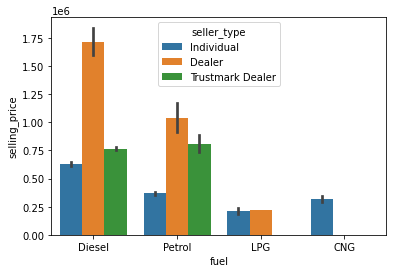

In [228]:
sns.barplot(df7['fuel'],df7['selling_price'],hue=df7['seller_type'])

In [229]:
df7.sample()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,car_name,used_year,engine_cc,max_power_bhp,torque_upd
6195,450000,192000,Diesel,Individual,Manual,Fourth & Above Owner,12.8,8.0,Toyota Innova,16,2494.0,102,196.2


In [241]:
df7['max_power_bhp']=df7['max_power_bhp'].astype('float')

In [244]:
df7.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,car_name,used_year,engine_cc,max_power_bhp,torque_upd
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,5.0,Maruti Swift,8,1248.0,74.00,190.00
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,5.0,Skoda Rapid,8,1498.0,103.52,250.00
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,5.0,Honda City,16,1497.0,78.00,117.72
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,5.0,Hyundai i20,12,1396.0,90.00,215.82
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,5.0,Maruti Swift,15,1298.0,88.20,107.91


In [307]:
x_train, x_test, y_train, y_test=train_test_split(df7.drop(['selling_price'],axis=1), df7.iloc[:,:1], test_size=0.15,random_state=1)

In [308]:
x_train.head(2)

,km_driven,fuel,seller_type,transmission,owner,mileage,seats,car_name,used_year,engine_cc,max_power_bhp,torque_upd
695,150000,Petrol,Individual,Manual,Second Owner,18.9,5.0,Maruti Wagon,13,1061.0,67.00,84.0
4395,10000,Diesel,Individual,Automatic,First Owner,13.8,7.0,Isuzu MUX,3,2999.0,174.57,380.0


In [318]:
step1=ColumnTransformer([
                         ('ohe',OneHotEncoder(sparse=False, drop='first', handle_unknown='error'), [1,2,3,4,7]),
],remainder='passthrough')

In [325]:
step2=StandardScaler()
step3=LinearRegression()

In [326]:
pipe=Pipeline([
               ('step1',step1),
               ('step2',step2),
               ('step3',step3),
])

In [327]:
from sklearn import set_config
set_config(display='diagram')

In [328]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 7])])),
                ('step2', StandardScaler()), ('step3', LinearRegression())])

In [329]:
pipe.predict(x_test)

array([[301380.83593476],
       [473018.18163405],
       [979558.84293125],
       ...,
       [302849.47749069],
       [710073.78818292],
       [593090.35511888]])

In [330]:
pipe.score(x_test, y_test)

0.9570139113852935

In [333]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(df7, open('clean_df.pkl','wb'))